<a href="https://colab.research.google.com/github/michael96247/CSE144-Applied-Machine-Learning-Homework/blob/main/CSE144_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# Assignment 3

**DUE: Sunday November 6, 2022 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [2]:
NAME = "Michael Chen"
STUDENT_ID = "1772059"

## Question 1 - Logistic Regression
---
In this question, you will build a system for predicting patient deaths in the Intensive Care Unit (ICU) using the large [PhysioNet Computing in Cardiology Challenge 2012 dataset](https://physionet.org/content/challenge-2012/1.0.0/). For each patient in the dataset, demographic variables and time series of physiological variables were collected during their stay in the ICU. 

The risk prediction system you will build could in principle be used to flag patients as being at risk of death so that physicians could intervene and improve their outcome. To be confident about the impact of such a system, you would need to run an experiment. In this question, you will use a model in order to estimate the potential impact of the system.

The data you will be working with is all available from [PhysioNet](https://physionet.org/challenge/2012/). You will be looking at only the data in "Training set A". The patient data files are [https://archive.physionet.org/challenge/2012/set-a.zip](here), and the outcomes file is [https://archive.physionet.org/challenge/2012/Outcomes-a.txt](here).





#### Downloading and Reading in the Data

First, we download the physiological data and read in patient outcomes file (links above).

We want this data to be read from text files and assembled into a dataframe. To do so, please run the following code which will first define a function that reads a text file, and then runs that function on all the files and assembles the outputs into a single dataframe.

#### Downloading the data

In [3]:
!wget https://archive.physionet.org/challenge/2012/set-a.zip -O ./set-a.zip
import zipfile
with zipfile.ZipFile('./set-a.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

--2023-02-08 06:19:55--  https://archive.physionet.org/challenge/2012/set-a.zip
Resolving archive.physionet.org (archive.physionet.org)... 128.30.30.88
Connecting to archive.physionet.org (archive.physionet.org)|128.30.30.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7938449 (7.6M) [application/zip]
Saving to: ‘./set-a.zip’

./set-a.zip         100%[===================>]   7.57M  16.8MB/s    in 0.5s    

2023-02-08 06:19:56 (16.8 MB/s) - ‘./set-a.zip’ saved [7938449/7938449]



#### Reading in data

In [4]:
import pandas as pd
import numpy as np
import glob

def comp_patient(patdat, attrs):
    patdat[patdat == -1.0] = float('NaN')
    patdat_dict = {}
    for attr in attrs:
        patdat_dict[attr] = [patdat["Value"][patdat["Parameter"]==attr].mean(axis = 0)]
    return patdat_dict


attrs = ["Age", "Gender", "Height", "Weight", "Urine", 
         "HR", "Temp", "NIDiasABP", "SysABP", "DiasABP", "pH",
         "PaCO2", "PaO2", "Platelets", "MAP", "K", "Na", "FiO2", "GCS", "RecordID"]


full_dat  = pd.DataFrame(columns = attrs)

# Now let's take the list "all_pat_dat" and assemble it into a dataframe.
filenames = sorted(glob.glob("/content/set-a/*.txt"))
print(len(filenames))
for filename in filenames:
    data = open(filename)
    patient_dat_full = pd.read_csv(data, delimiter=',')
    patient_dat = pd.DataFrame.from_dict(comp_patient(patient_dat_full, attrs))
    full_dat = full_dat.append(patient_dat)

outcome_dat = pd.read_csv("https://archive.physionet.org/challenge/2012/Outcomes-a.txt")
outcome_dat[outcome_dat == -1] = float('NaN') # set all -1 to NaNs
full_dat_out = full_dat.merge(outcome_dat, left_on='RecordID', right_on='RecordID')
full_dat_out.replace([np.inf, -np.inf], np.nan)

col_means = full_dat_out.mean()
# Set everything that's NaN to the mean of that column:

# Note: we do this for simplicity. Strictly speaking, you should
# only use the training set to compute the column means

for i in range(full_dat_out.shape[1]):
    mask = np.isnan(np.array(full_dat_out.iloc[:,i]))
    full_dat_out.iloc[mask, i] = col_means[i]



4000


In [5]:
from numpy.random import seed
seed(42)


print(outcome_dat.info())
print(outcome_dat.shape)
print(full_dat_out.shape)
print(full_dat_out.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RecordID           4000 non-null   int64  
 1   SAPS-I             3810 non-null   float64
 2   SOFA               3856 non-null   float64
 3   Length_of_stay     3940 non-null   float64
 4   Survival           1474 non-null   float64
 5   In-hospital_death  4000 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 187.6 KB
None
(4000, 6)
(4000, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                4000 non-null   float64
 1   Gender             4000 non-null   float64
 2   Height             4000 non-null   float64
 3   Weight             4000 non-null   float64
 4   Urine              4000 non-null

### a) Understanding the Data (2 points)
Looking at the files and the code provided above, explain:


*   What is the size of your input data? how many parameters exist in the data?
*   Exaplain what the code provided above is trying to achieve.



The size of the input data is 4000x25. There are 25 parameters exist in the data.
At first, the code extract the data of 4000 patients from 4000 different files and store them in full_dat. Then read the outcome data of the patients and set all -1 to NaN. Then combine the patients' data with outcome data. Then set all infinite and -infinite values to NaN. Finally, set everything that's NaN to the mean of that column.

### b) Run Logistic Regression (9 points)


Divide your data into training, validation, and test sets (60-20-20). 

Use the features `HR`, `Gender`, `age`, `temperature`, `weight`, `height`, `PaO2`, and  `PaCO2`, and fit a logistic regression model to predict in-hospital death. 

In [6]:
# temp = full_dat_out[['HR', 'Gender', 'Age', 'Temp', 'Weight', 'Height', 'PaO2', 'PaCO2']].copy()
all_index = []
for i in ['HR', 'Gender', 'Age', 'Temp', 'Weight', 'Height', 'PaO2', 'PaCO2']:
  full_dat_out['Z'] = (full_dat_out[i] - full_dat_out[i].mean() ) / full_dat_out[i].std()
  indexes= full_dat_out[ full_dat_out['Z'] > 4].index
  # all_index.append(indexes)
  full_dat_out.drop(indexes, inplace=True)
  indexes= full_dat_out[ full_dat_out['Z'] < -4].index
  # all_index.append(indexes)
  full_dat_out.drop(indexes, inplace=True)

# for i in all_index:
#   full_dat_out.drop(i, inplace=True)

full_dat_out.drop(columns = ['Z'])

print(full_dat_out.describe())

               Age       Gender       Height       Weight        Urine  \
count  3889.000000  3889.000000  3889.000000  3889.000000  3889.000000   
mean     64.387246     0.562532   169.716806    82.266283   133.626520   
std      17.559575     0.495947     7.881150    21.038165   117.630703   
min      15.000000     0.000000   121.900000     3.500000     0.000000   
25%      53.000000     0.000000   169.787227    68.000000    74.088235   
50%      67.000000     1.000000   169.787227    81.900000   113.593750   
75%      78.000000     1.000000   170.200000    92.600000   159.687500   
max      90.000000     1.000000   205.700000   173.800000  3082.380952   

                HR         Temp    NIDiasABP       SysABP      DiasABP  ...  \
count  3889.000000  3889.000000  3889.000000  3889.000000  3889.000000  ...   
mean     87.135795    36.986341    57.305192   118.610106    59.519190  ...   
std      14.466687     0.593280    10.891545    16.338239     8.825345  ...   
min      42.78431

In [7]:
### YOUR CODE HERE ###

x = full_dat_out[['HR', 'Gender', 'Age', 'Temp', 'Weight', 'Height', 'PaO2', 'PaCO2']]
y = full_dat_out[['In-hospital_death']]

x = x.values
y = y.values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train, x_vali, y_train, y_vali = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
# print(x_train)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### c) ROC Curve (10 points)

Write a function that, for a given threshold (prob. threshold), calculates both the False Positive Rate (proportion of non-deaths identified as deaths by the model) and True Positive Rate (proportion of deaths correctly identified as such by the model) for your regression model. 

For 100 threshold values equally spaced from 0 to 1, plot the True Positive Rate vs. the False Positive Rate. Use the validation set.

This plot is known as an ROC curve. 


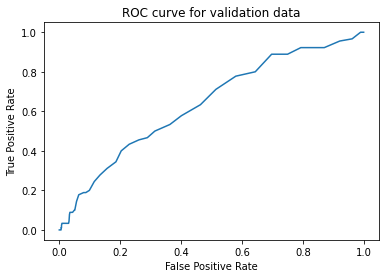

In [8]:
### YOUR CODE HERE ###
# def roc_Curve(threshold):
#   TP = 0
#   FP = 0
#   TN = 0
#   FN = 0
#   for i in range(len(y_pred)):
#     if(y_pred[i] > threshold and y_vali[i] == 1):
#       TP += 1
#     elif(y_pred[i] > threshold and y_vali[i] == 0):
#       FP += 1
#     elif(y_pred[i] < threshold and y_vali[i] == 0):
#       TN += 1
#     else:
#       FN += 1
#   return FP/(FP+TN), TP/(TP+FN) # TPR/len(y_pred), FPR/len(y_pred)
  

# y_pred = regressor.predict(x_vali)

# x_line = []
# y_line = []

# for i in np.linspace(0, 1, 100):
#   x, y = roc_Curve(i)
#   x_line.append(x)
#   y_line.append(y)

import matplotlib.pyplot as plt





def get_probs(clf, x):
    num_items = x.shape[0]
    return np.array([clf.predict_proba(x)[i, 1] for i in range(num_items)])

def predict_with_threshold(probs, thresh=0.5):
    return np.array([(p > thresh)*1 for p in probs])

def false_and_true_positives(preds, labels):
    n = len(labels)
    true = false = pos = neg = 0
    for i in range(len(labels)):
        if labels[i] == 1:  pos += 1
        if labels[i] == 0:  neg += 1
        if (preds[i] == 1) and (labels[i] == 1):  true  += 1
        if (preds[i] == 1) and (labels[i] == 0):  false += 1
    return false / neg, true / pos

# Get the raw prediction probabilities.
val_probs = get_probs(regressor, x_vali)

false_positives, true_positives = [], []
for t in np.linspace(0., 1., 100):
    val_preds = predict_with_threshold(val_probs, thresh=t)
    false_pos, true_pos = false_and_true_positives(val_preds, y_vali)
    false_positives.append(false_pos)
    true_positives.append(true_pos)


plt.plot(false_positives, true_positives)
plt.title('ROC curve for validation data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# plt.plot(x_line, y_line, color='red', linewidth=1)
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.show()

### d) Interpreting the ROC Curve (4 points)

Using the plot generated in Part (c), what is the False Positive Rate associated with correctly identifying 80% of patients at risk for death in the ICU? Why might a high false positive rate be appropriate in this setting? You can read the answer off the ROC curve plot.


[YOUR ANSWER HERE]
The False Positive Rate is about 65% to 70%. A high false positive rate is appropriate in this setting because we don't want to miss any patients who could die without proper treatments.


### e) Modelling Doctors' Decision-Making (6 points)

For this part, produce a short report that answers all the questions below. Include code that produces the numbers that you need.

At the beginning of their shift, a doctor reviews their patients' charts, and decides what intervention is needed for each patient. In the following parts, we will be trying to improve this process. We will consider a simplified version of what is going on. Suppose that if the doctor intervenes correctly, the patient will not die; suppose that the doctor has 60 minutes to look through 25 patient charts; and suppose that the probability of missing the correct treatment if the doctor spends $t$ minutes on reviewing a file is

$$P(\textrm{fail}) = \exp(-t^2/100).$$


1. If the doctor reviews all the files, spends an equal amount of time on each chart, and there are 10 patients who will die without the correct intervention, how many patients are expected to die, if the doctor intervenes when they see that that's needed? What is the percentage of patients who are expected to die, out of 25?

2. Suppose now that the doctor is looking through all the patient charts in the validation set. They would have proportionately more time: $(N/25)\times 60$ minutes in total (where $N$ is the total number of patients in the set). How many patients would be expected to die, if the doctor intervenes correctly when they know they should do that?

3. Now, suppose that the doctor only reviews the files of patients for whom the model outputs a probability of greater than $20\%$. This would give the doctor more time to look through each file, but the doctor would never be able to intervene in the cases of patients form whom the output is $20\%$ or smaller. How many patients would be expected to die?



[YOUR ANSWER HERE]
1. If the doctor reviews all the files and spends an equal amount of time on each chart, the doctor would be spending 2.4 minutes on each patient chart. exp(-(2.4)^2 / 100 ) = 0.944. So if there are 10 patients who will die without the correct intervention, 10 * 0.944 = 9.44. So 9.44 patients are expected to die. The percentage of patients who are expected to die is 9/25 or 36%.
2. 84.96, or about 85 patients. I used the code below to calculate the answer.
3. 65.46 patients are expected to die. I used the code below to calculate the answer.

In [9]:
import math
all_patients_in_vali = len(y_vali)
print("The number of patients in Validation set : ", len(y_vali))
dying = len([i for i in y_vali if i])
print("The number of patients in Validation set that is dying: ", len([i for i in y_vali if i]))
time = (all_patients_in_vali / 25 * 60)
time /= all_patients_in_vali
print("The time for each patient is : ", time)
print("The dying rate is : ", math.exp(-1 * math.pow(time, 2) / 100))
print("The number of patients dying is: ", math.exp(-1 * math.pow(time, 2) / 100) * dying)


y_pred = get_probs(regressor, x_vali)

doctor_spend_time = 0
death = 0
dying_people = 0
for i in range(all_patients_in_vali):
  if(y_pred[i] > 0.2):
    doctor_spend_time += 1
    if(y_vali[i]):
      dying_people += 1
  elif(y_pred[i] < 0.2 and y_vali[i] ):
    death += 1
the_time = all_patients_in_vali / 25 * 60 / doctor_spend_time
print(doctor_spend_time)
print("The number of people dying is : ", math.exp(-1 * math.pow(the_time, 2) / 100) * dying_people + death)


The number of patients in Validation set :  778
The number of patients in Validation set that is dying:  90
The time for each patient is :  2.4
The dying rate is :  0.9440274829178357
The number of patients dying is:  84.9624734626052
179
The number of people dying is :  65.4634562509928


### f) Modelling Doctors' Decision-Making - Revisited (7 points)


In this Part, you will explore the policy implications of using our model in an understaffed hospital. 

Suppose that we are considering a policy of only reviewing the files of patients whose probability of death is above a threshold `thr`. Each chart would be given an equal amount of time, and the total amount of time will be $(N/25)\times 60$.

Using the model from previous part, plot the total number of expected deaths under the policy vs. the threshold. Using the plot, what is the best threshold to use that would minimize the number of deaths?

You should compute the expected number of deaths for the thresholds `np.arange(0, 1, 0.01)`.

Use the validation set.




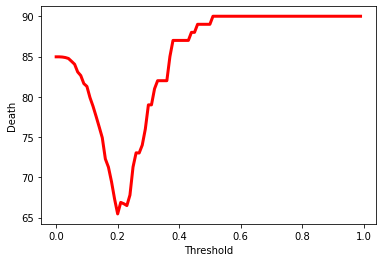

Min death:  65.4634562509928 0.2


In [10]:
### YOUR CODE HERE ###
import math

y_pred =  get_probs(regressor, x_vali)

x_line = []
y_line = []
min_death = np.inf
min_thres = None
for threshold in np.arange(0, 1, 0.01): #np.linspace(0, 1, 100):
  death = 0
  to_be_treated = 0
  wasting_time = 0
  for i in range(len(y_pred)):
    if(y_pred[i] < threshold and y_vali[i]):
      death += 1
    elif(y_pred[i] > threshold and y_vali[i]):
      to_be_treated += 1
    elif(y_pred[i] > threshold):
      wasting_time += 1
  
  if(to_be_treated):
    total_time = ( len(y_pred) / 25 * 60 ) / (to_be_treated + wasting_time)
    
    death += math.exp(-1 * math.pow(total_time, 2) / 100) * to_be_treated

  x_line.append(threshold)
  y_line.append(death)
  if(death < min_death):
    min_death = death
    min_thres = threshold

import matplotlib.pyplot as plt

plt.plot(x_line, y_line, color='red', linewidth=3)
plt.xlabel("Threshold")
plt.ylabel("Death")
plt.show()
print("Min death: ", min_death, min_thres)

[YOUR ANSWER HERE]
The best threshold is 0.2 since it has the fewest death.

### g) Modelling Doctors' Decision-Making - Testing (7 points)

On the test set, compare the total number of expected deaths under the best policy that was selected in Part (f) to reviewing each patient's file. In relative terms (i.e., as a percentage), how many lives would be saved, if the assumptions underlying our simulation are accurate?

In [11]:
y_pred =  get_probs(regressor, x_test)

patient_num_test = len(x_test)
doctor_spend_time = 0
death = 0
dying_people = 0
for i in range(patient_num_test):
  if(y_pred[i] > 0.2):
    doctor_spend_time += 1
    if(y_test[i]):
      dying_people += 1
  elif(y_pred[i] < 0.2 and y_test[i] ):
    death += 1
the_time = patient_num_test / 25 * 60 / doctor_spend_time
print("The number of patients dying is : ", math.exp(-1 * math.pow(the_time, 2) / 100) * dying_people + death)
best_policy_death = math.exp(-1 * math.pow(the_time, 2) / 100) * dying_people + death

print("The number of patients in Test set : ", patient_num_test)
dying = len([i for i in y_test if i])
print("The number of patients in Test set that is dying: ", len([i for i in y_test if i]))
time = (patient_num_test / 25 * 60)
time /= patient_num_test
print("The time for each patient is : ", time)
print("The dying rate is : ", math.exp(-1 * math.pow(time, 2) / 100))
print("The number of patients dying is: ", math.exp(-1 * math.pow(time, 2) / 100) * dying)
review_each_death =  math.exp(-1 * math.pow(time, 2) / 100) * dying

print("The percentage of lives being saved is : ", (review_each_death - best_policy_death) / review_each_death)

The number of patients dying is :  76.78295618758025
The number of patients in Test set :  778
The number of patients in Test set that is dying:  107
The time for each patient is :  2.4
The dying rate is :  0.9440274829178357
The number of patients dying is:  101.01094067220842
The percentage of lives being saved is :  0.23985505256554965


The percentage of lives being save is 0.23985.

## Question 2 - Neural Networks
---

We will train a fully connected neural networks to recognize face images of cats and dogs. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [13]:
data_dir = 'pets'
image_width = 32
image_height = 32
batch_size = 10

### a) Load the Pets Dataset (2 points)
There are 110 images of size $32\times32$. Run the following code block to import the data. Keep in mind that they will be downloaded from the internet, so it may take a while.

In [14]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [15]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [16]:
# Download the data
downloaded = drive.CreateFile({'id':"1NXiYkupBcolg90e6wE_Nm_F9VTFoXIja"})
downloaded.GetContentFile('pets.npy')  
data = np.load("pets.npy",allow_pickle=True)

In [17]:
# Create X and y
X, y = (data[()]['X'], data[()]['y'])

In [18]:
# Get class names and create ID
class_names = ['cat', 'dog']
class_dict = {i:class_name for i,class_name in enumerate(class_names)}

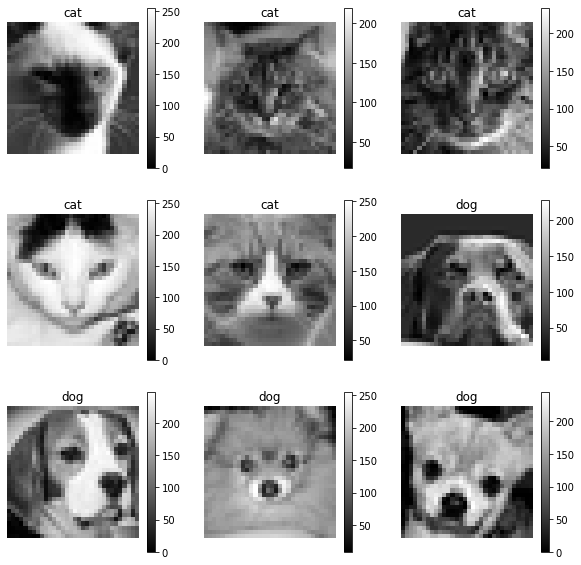

In [19]:
# Plot some images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for count, i in enumerate(range(0,110, 13)):
    ax = plt.subplot(3, 3, count + 1)
    plt.imshow(X[i],cmap='gray')
    plt.colorbar()
    plt.title(class_names[y[i]])
    plt.axis("off")

Answer the following questions:

1.) What are the data types for X and y?

2.) What are the shapes of X and y?

3.) What is the minimum and maximum value of X?

[YOUR ANSWER HERE]
1. The data type of X is a 3D ndarray. The data type of y is a 1D ndarray.
2. The shape of X is 110 x 32 x 32. The shape of y is 1 x 110.
3. The minimum value of X is 0 and maximum value of X is 255.

### b) Data Preprocessing (3 points)
As you can see above, the pixel values are in the [0,255]. This is the normal range for images. Recall from the previous lectures and excercises that we need to normalize our data.

In order to normalize our data to [0,1] we use the equation:

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In our case we can assume that $x_{min}=0$ and $x_{max}=255$, this is a safe assumption since we are working with image data.

This means that for image data, if we want to normlize to [0,1] the equation simplifies to:

$$img_{norm}=\frac{img}{255}$$

Anytime you work with image data in any kind of model you will be normalizing with this equation. Unless the range you want to normalize is different. Sometimes you want to normalize between [-1,1], for that you would use a slightly different equation.


Normalize the X data using the above equation and save as train_images.

In [20]:
train_images = X/255 # YOUR CODE HERE

If we show the image agian, you will see the values are all scaled correctly.

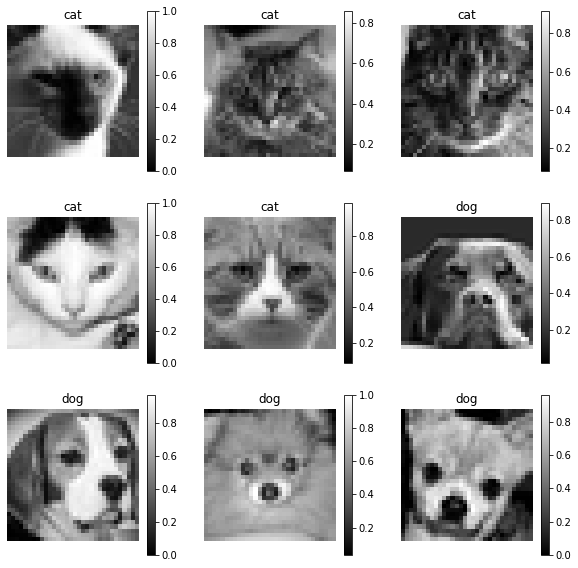

In [21]:
# Plot images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for count, i in enumerate(range(0,110, 13)):
    ax = plt.subplot(3, 3, count + 1)
    plt.imshow(train_images[i],cmap='gray')
    plt.colorbar()
    plt.title(class_names[y[i]])
    plt.axis("off")

What is the new minimum and maximum value of X?

[YOUR ANSWER HERE]
The new minimum is 0 and the new maximum is 1

### c) Reshaping the Data (5 points)

Please reshpe training images to be 1024-dim (from $32 \times 32$). 

Hint: look into numpy.reshape().


In [22]:
print(f'Before reshape, train_images shape: {train_images.shape}')

train_images = train_images.reshape(110, 1024)# YOUR CODE HERE

print(f'Before reshape, train_images shape: {train_images.shape}')


Before reshape, train_images shape: (110, 32, 32)
Before reshape, train_images shape: (110, 1024)


### d) Building a Simple Neural Network (15 points)
In the cell below, build a fully-connected feed-forward neural network with the following layers:
* **input layer** of shape 1024
* **hidden layer** with 25 neurons, and relu activation
* **output layer** with 1 neuron, and sigmoid activation

In [23]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import *

# Build neural network
# YOUR CODE HERE

inputs = tf.keras.Input(shape=(1024))
x = tf.keras.layers.Dense(25, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [24]:
# Show a summary of your model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 25)                25625     
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 25,651
Trainable params: 25,651
Non-trainable params: 0
_________________________________________________________________


Declare the optimizer using Stochastic Gradient Descient with learning rate of 0.001, weight decay of 1e-6 and momentum of 0.009. Compile your model using the 'binary_crossentropy' loss function and 'accuracy' as the metrics.

In [25]:
# Declare optimizer
optimizer =  tf.keras.optimizers.SGD(
    learning_rate=0.001, momentum=0.009, name="SGD", decay=1e-6) # YOUR CODE HERE

# Compile model
# YOUR CODE HERE

model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = optimizer, metrics=['accuracy'])

Now we will train our model to learn pet faces using train_images and the 'y' labels. Our dataset is small so we will use 10% of the data as test set data. Train your model using the following parameters:

Fit your model using the train_images, 'y' labels, a batchsize of 10, and validation split of 0.1. Train for 500 epochs.

.fit documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [26]:
y = y.reshape(-1,1)

# Call fit on your model passing in the X, y data above, train for 500 epochs
hist =  model.fit(train_images, y, batch_size = 10, validation_split=0.1, epochs  = 500) # YOUR CODE HERE


Epoch 1/500
10/10 [==============================] - 4s 34ms/step - loss: 0.7061 - accuracy: 0.5455 - val_loss: 0.7648 - val_accuracy: 0.1818
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5354 - val_loss: 0.7909 - val_accuracy: 0.0909
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6875 - accuracy: 0.5657 - val_loss: 0.8122 - val_accuracy: 0.0909
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.6162 - val_loss: 0.8224 - val_accuracy: 0.0909
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6752 - accuracy: 0.6465 - val_loss: 0.8100 - val_accuracy: 0.0909
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6713 - accuracy: 0.6465 - val_loss: 0.8054 - val_accuracy: 0.0909
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6647 - accuracy: 0.6465 - val_loss: 0.8015 - val_accuracy: 0.0909
Epoch 8/500


In [27]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

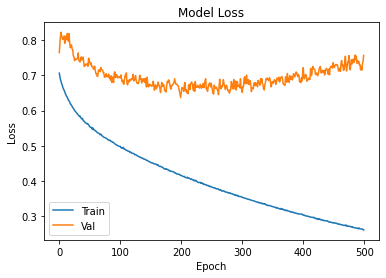

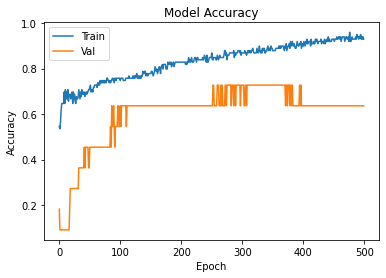

0.6369914412498474
0.7272727489471436


In [28]:
# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)
print(min(hist.history['val_loss']))
print(max(hist.history['val_accuracy']))

For the input size, this one hidden layer neural network is probably too small. However, we can see that the model attempts to minimize the overall loss. Summarize your observations on the model's learning curves, model's overall classification accuracy on the validation set, and the least amount of loss on validation set?

[YOUR ANSWER HERE]
The model is overfitting. The accuracy of the validation set went lower and the loss of the validation set went higher as the epoch increase. The maximum accuracy on the validation set is 0.9090909361839294. The least amount of loss on validation set is 0.5922207832336426.

### e) Building a Second Neural Network (15 points)
Next, you will build a neural network with one hidden layer that is wider than the previous model's hidden layer. In the cell below, build a neural network with the following layers:
* **input layer** of shape 1024
* **hidden layer** with 100 neurons, and relu activation
* **output layer** with 1 neuron, and sigmoid activation

In [29]:
# Build Neural network
# YOUR CODE HERE

inputs = tf.keras.Input(shape=(1024))
x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [30]:
# Show a summary of your model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_2 (Dense)             (None, 100)               102500    
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


Again, declare the optimizer using Stochastic Gradient Descient with learning rate of 0.001, weight decay of 1e-6 and momentum of 0.009. Compile your model using 'binary_crossentropy' loss function and 'accuracy' as the metrics.

In [31]:
# Declare optimizer
optimizer =  tf.keras.optimizers.SGD(
    learning_rate=0.001, momentum=0.009, name="SGD", decay=1e-6)  # YOUR CODE HERE

# Compile model
# YOUR CODE HERE
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = optimizer, metrics=['accuracy'])

In this sell fit your model using the train images, y labels, a batchsize of 10, and validation split of 0.1. Train for 500 epochs.

In [32]:
y = y.reshape(-1,1)

# Call fit on your model passing in the X, y data above, train for 500 epochs
hist =  model.fit(train_images, y, batch_size = 10, validation_split=0.1, epochs  = 500) # YOUR CODE HERE

Epoch 1/500
10/10 [==============================] - 1s 19ms/step - loss: 0.7319 - accuracy: 0.5556 - val_loss: 0.9266 - val_accuracy: 0.1818
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7148 - accuracy: 0.5051 - val_loss: 0.8775 - val_accuracy: 0.2727
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7058 - accuracy: 0.5051 - val_loss: 0.8617 - val_accuracy: 0.2727
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6963 - accuracy: 0.4949 - val_loss: 0.8440 - val_accuracy: 0.2727
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.5354 - val_loss: 0.8254 - val_accuracy: 0.2727
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6835 - accuracy: 0.5253 - val_loss: 0.8193 - val_accuracy: 0.2727
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6768 - accuracy: 0.5354 - val_loss: 0.8054 - val_accuracy: 0.2727
Epoch 8/500


In [33]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

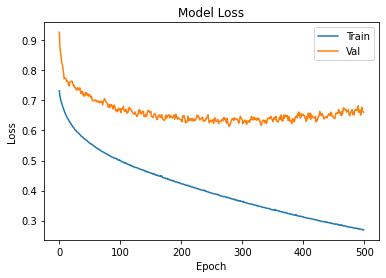

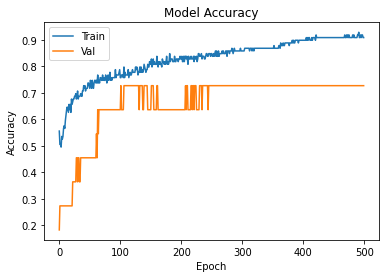

0.6132674217224121
0.7272727489471436


In [34]:
# Plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)
print(min(hist.history['val_loss']))
print(max(hist.history['val_accuracy']))

Next, summarize this models results. Consider the following questions when answering. Remember that this model has a higher learning capacity than the previous model. 

1) How did this model compare to previous model? 

2) Did it outperform the previous models? 

3) What was your model's overall classification accuracy on the validation set and the least amount of loss on validation set? 

[YOUR ANSWER HERE]
1. It performs almost the same compare to the previous model as both have similar loss and accuracy on the validation set.
2. No, it doesn't outperform the previous models as they are pretty similar. They both have similar loss accuracy on the validation set.
3. The overall classification accuracy is 0.8182 and the least amount of loss on validation set is 0.5853227972984314.

### f) Building a Third Neural Network (15 points)
Lastly, you will build a fully-connected neural network with two hidden layers. In the cell below, build a neural network with the following layers:
* **input layer** of shape 1024
* **hidden layer** with 100 neurons, and relu activation
* **hidden layer** with 25 neurons, and relu activation
* **output layer** with 1 neuron, and sigmoid activation

In [35]:
from tensorflow.keras.layers import Input, Dense # only use these layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import * # you can use any optimizer

# Build Neural network
# YOUR CODE HERE
inputs = tf.keras.Input(shape=(1024))
x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(25, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [36]:
# Show a summary of your model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_4 (Dense)             (None, 100)               102500    
                                                                 
 dense_5 (Dense)             (None, 25)                2525      
                                                                 
 dense_6 (Dense)             (None, 1)                 26        
                                                                 
Total params: 105,051
Trainable params: 105,051
Non-trainable params: 0
_________________________________________________________________


Since this model is bigger than the previous models, we will use a more powerful optimizer. Declare the optimizer as Adam with learning rate of 0.001. Compile your model using 'binary_crossentropy' loss function and 'accuracy' as the metrics.

In [37]:
# Declare optimizer
Adam =  tf.keras.optimizers.Adam(learning_rate=0.001) # YOUR CODE HERE

# Compile model
# YOUR CODE HERE

model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = Adam, metrics=['accuracy'])

In this sell fit your model using the train images, y labels, a batchsize of 10, and validation split of 0.1. Train for 500 epochs.

In [38]:
y = y.reshape(-1,1)

# Call fit on your model passing in the X, y. 
# Train for 500 epochs with a batch size of 10 and validation split of 0.1
hist = model.fit(train_images, y, validation_split = 0.1, epochs = 500) # YOUR CODE HERE

Epoch 1/500
4/4 [==============================] - 1s 54ms/step - loss: 0.7880 - accuracy: 0.5051 - val_loss: 0.6072 - val_accuracy: 0.7273
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5981 - accuracy: 0.7576 - val_loss: 1.2128 - val_accuracy: 0.0000e+00
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6417 - accuracy: 0.5455 - val_loss: 0.5847 - val_accuracy: 0.8182
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6654 - accuracy: 0.6263 - val_loss: 0.4815 - val_accuracy: 0.8182
Epoch 5/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5775 - accuracy: 0.6263 - val_loss: 1.1362 - val_accuracy: 0.0000e+00
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5476 - accuracy: 0.6869 - val_loss: 0.5925 - val_accuracy: 0.7273
Epoch 7/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5203 - accuracy: 0.7374 - val_loss: 0.7331 - val_accuracy: 0.6364
Epoch 8/500


In [39]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

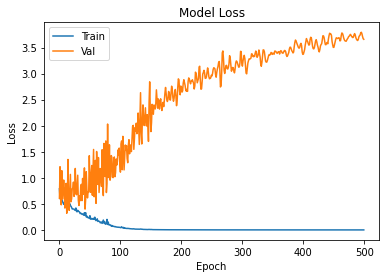

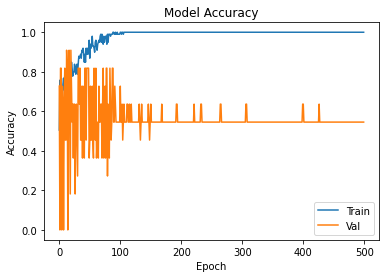

0.3194626271724701
0.9090909361839294


In [40]:
# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)
print(min(hist.history['val_loss']))
print(max(hist.history['val_accuracy']))

Summarize this model's results. Consider the following when answering:

1) How did this model compare to previous models? 

2) Did it outperform the previous models? 

3) What was your model's overall classification accuracy on the validation set and the least amount of loss on validation set? 

4) Adam is a powerful optimizer, and may quickly converge to an a minima. Did this happen with this model?

[YOUR ANSWER HERE]
1. It performs better compare to the previous models as it has the lowest leat amount of loss on the validation set and highest accuracy.
2. Yes, the loss is lower and the accuracy is higher for the validation set.
3. After training, accuracy of validation set is 0.5455. The maximum accuracy for validation set is 1.0. The least the amount of loss on validation set is is 0.160.
4. Yes, it quickly converge to a minima and start overfitting. After it converges, the loss on the training data keep getting lower but the loss on the validation set start getting higher and higher and the accuracy of the validation set also went lower and lower as the epoch increases.